In [12]:
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot as plt
import time
from tqdm.auto import tqdm
import numpy as np

import requests
from datetime import datetime
from ensembledata.api import EDClient

# Retrieve Comments

In [13]:
client = EDClient("qJ7NRHieTTvFcV14")

In [17]:
df = pd.read_csv('ian_posts.csv')

len(df)

35

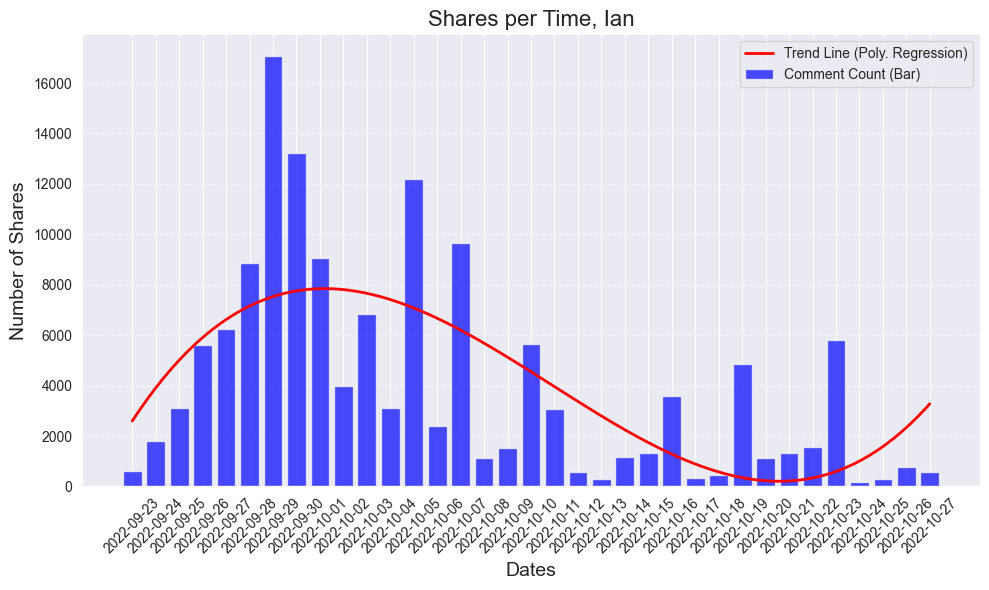

In [18]:
# Convert time to numeric if needed (e.g., integer indices for regression)
x = np.arange(len(df["createTime"]))
y = df["commentCount"]

# Fit a polynomial regression (high degree for smooth curve)
coeffs = np.polyfit(x, y, deg=3)
poly = np.poly1d(coeffs)

# Generate smooth values for the regression line
x_smooth = np.linspace(x.min(), x.max(), 200)
y_smooth = poly(x_smooth)
plt.figure(figsize=(10, 6))

# Bar chart
plt.bar(df["createTime"], y, color='b', alpha=0.7, label='Comment Count (Bar)')

# Plot the polynomial regression line
plt.plot(x_smooth, y_smooth, color='r', linewidth=2, label='Trend Line (Poly. Regression)')

# Customize the plot
plt.title('Shares per Time, Ian', fontsize=16)
plt.xlabel('Dates', fontsize=14)
plt.ylabel('Number of Shares', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(ticks=x, rotation=45)
plt.legend()  # Add legend

# Show the plot
plt.tight_layout()
plt.show()


In [16]:
# WE DO THIS TOGETHER
## YOU HAVE USED 20 UNITS IN ORDER TO RETRIEVE POSTS (OUT OF 50)

## COMMENTS TAKE A LOT OF UNITS TO RETRIEVE
## EACH DATASET ITERATES THROUGH POSTS, SO EACH HURRICANE HAS DIFFERENT COSTS

## DO THE MATH TO USE LESS THAN 50 UNITS OR IT WILL NOT RUN AND EMPTY YOUR TOKENS!
## SEE THE LAST PRINTED DATASET TO CHECK HOW MANY ROWS YOU HAVE TO ITERATE THROUGH
#---

comments_to_retrieve = 30

comments = list()
for i in range(len(df)):
    aweme_id = df["id"][i]
    cursor = None
    for _ in range(int(comments_to_retrieve / 30)):
        result = client.tiktok.post_comments(
            aweme_id=aweme_id,
            cursor=cursor
        )
        comments.extend(result.data["comments"])
        cursor = result.data.get("nextCursor")
        if cursor is None:
            break
            
# convert json to dataframe
df = pd.json_normalize(comments)

# extract relevant info
df = df[['aweme_id', 'cid', 'create_time', 'text', 'reply_comment_total']]

# format time to date in string format
df["create_time"] = [str(datetime.fromtimestamp(int(i)).date())
                     for i in df["create_time"]]

# order by number of replies
df = df.sort_values(by=['reply_comment_total'], ascending=False).reset_index(drop=True)

# save
df_comments = df
df_comments.to_csv('ian_comments.csv', index=False)
df_comments

,aweme_id,cid,create_time,text,reply_comment_total
0,7147128979391139114,7147155891250053930,2022-09-25,This is my first year living in Florida and I’...,219
1,7151582807192587566,7151629317943116586,2022-10-07,I would have had those cars sent well inland b...,161
2,7149856973113003269,7149867032770069253,2022-10-02,Schools will remain open,143
3,7150685798008999211,7150761601004077870,2022-10-04,He’s doing an excellent job and Florida is gra...,140
4,7147742399043931438,7147797067656987438,2022-09-26,We thank everyone coming into the storm to hel...,96
...,...,...,...,...,...
659,7151185613948013867,7151209342669226798,2022-10-06,Up here in Sarasota donation drives have begun...,0
660,7151185613948013867,7151196647752549166,2022-10-06,"best sheriff , proud to have him in lee county...",0
661,7151185613948013867,7151191424037585707,2022-10-06,Thank you for all you do for the people on the...,0
662,7152631252431080750,7154083992560157486,2022-10-13,Looks so overwhelming,0
